# Medical Imaging Cost Accounting

In [1]:
import math
import statistics
import pandas as pd
import numpy as np

In [18]:
from pprint import pprint

revenues: 3520018  
direct labor: 1375571  
overhead: 1982428

In [7]:
directlabor = 1375571
overhead = 1982428
total_expense = directlabor + overhead
revenues = 3520018

In [8]:
profit = revenues - total_expense
profit

162019

In [10]:
burdenrate = overhead / directlabor
burdenrate * 100.0

144.11673406897935

In [12]:
# labor breakdown
labor_breakdown = {
    "proj_radiographs": 417073,
    "fluoroscopies": 414047,
    "cat_scan": 270850,
    "mri_scan": 273601
}

In [13]:
sum(labor_breakdown.values())

1375571

In [14]:
sum(labor_breakdown.values()) == directlabor

True

## Existing Costing

In [16]:
perc_labor_breakdown = {}
for k,v in labor_breakdown.items():
    perc_labor_breakdown[k] = v/directlabor

In [17]:
perc_labor_breakdown

{'proj_radiographs': 0.30319990752930964,
 'fluoroscopies': 0.30100009377923787,
 'cat_scan': 0.1969000509606556,
 'mri_scan': 0.1988999477307969}

In [21]:
exist_costing = {}

for k, v in perc_labor_breakdown.items():
    exist_costing[k] = round(v * overhead + labor_breakdown[k], 2)
    
pprint(exist_costing)

{'cat_scan': 661190.17,
 'fluoroscopies': 1010758.01,
 'mri_scan': 667905.83,
 'proj_radiographs': 1018144.99}


In [36]:
sum(exist_costing.values())

3357999.0

In [24]:
pd.DataFrame(exist_costing, index=[0])

,proj_radiographs,fluoroscopies,cat_scan,mri_scan
0,1018144.99,1010758.01,661190.17,667905.83


## Accountant Proposed Costing

In [25]:
overhead_breakout = {
    "direct_labor_related": 721392,
    "equipment_related": 1261036
}

sum(overhead_breakout.values())

1982428

In [27]:
test_hours = {
    "proj_radiographs": 1060,
    "fluoroscopies": 1312,
    "cat_scan": 1394,
    "mri_scan": 2515
}

sum(test_hours.values())

6281

In [29]:
labor_breakdown, perc_labor_breakdown

({'proj_radiographs': 417073,
  'fluoroscopies': 414047,
  'cat_scan': 270850,
  'mri_scan': 273601},
 {'proj_radiographs': 0.30319990752930964,
  'fluoroscopies': 0.30100009377923787,
  'cat_scan': 0.1969000509606556,
  'mri_scan': 0.1988999477307969})

In [37]:
act_costing= {}

for k,v in perc_labor_breakdown.items():
    act_costing[k] = v*overhead_breakout.get("direct_labor_related") + \
        overhead_breakout.get("equipment_related") * test_hours[k]/6281 + \
        labor_breakdown[k]
    
act_costing

{'proj_radiographs': 848615.1252500975,
 'fluoroscopies': 894596.2223645358,
 'cat_scan': 692765.4194451121,
 'mri_scan': 922022.2329402547}

In [38]:
sum(act_costing.values())

3357999.0

## Consultant Proposed Costing

In [47]:
overhead_by_tech = {
    "hightech": 921793,
    "lowtech": 339243
}

sum(overhead_by_tech.values())

1261036

In [48]:
test_hours_by_tech = {
    "hightech": {'cat_scan': 819,
                 'fluoroscopies': 579,
                 'mri_scan': 2515,
                 'proj_radiographs': 268
                },
    "lowtech": {'cat_scan': 575,
                 'fluoroscopies': 733,
                 'mri_scan': 0,
                 'proj_radiographs': 792
                }
}

In [49]:
sum(test_hours_by_tech.get("hightech").values())

4181

In [50]:
sum(test_hours_by_tech.get("lowtech").values())

2100

In [57]:
cons_costing = {}

for k, v in perc_labor_breakdown.items():
    dl = labor_breakdown[k]
    
    dl_overhead = 721392 * \
        (test_hours_by_tech["hightech"][k] + test_hours_by_tech["lowtech"][k])/(4181 + 2100)
    
    hightech_cost = overhead_by_tech["hightech"] * \
        test_hours_by_tech["hightech"][k] / 4181
    
    lowtech_cost = overhead_by_tech["lowtech"] * \
        test_hours_by_tech["lowtech"][k] / 2100
    
    cons_costing[k] = dl + hightech_cost + lowtech_cost + dl_overhead

In [58]:
cons_costing

{'proj_radiographs': 725846.7744049525,
 'fluoroscopies': 810799.3897310173,
 'cat_scan': 704409.5977982256,
 'mri_scan': 1116943.2380658044}

In [59]:
sum(cons_costing.values())

3357998.9999999995

## Comparisons

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
sum(exist_costing.values()), sum(act_costing.values()), sum(cons_costing.values())

(3357999.0, 3357999.0, 3357998.9999999995)

<BarContainer object of 4 artists>

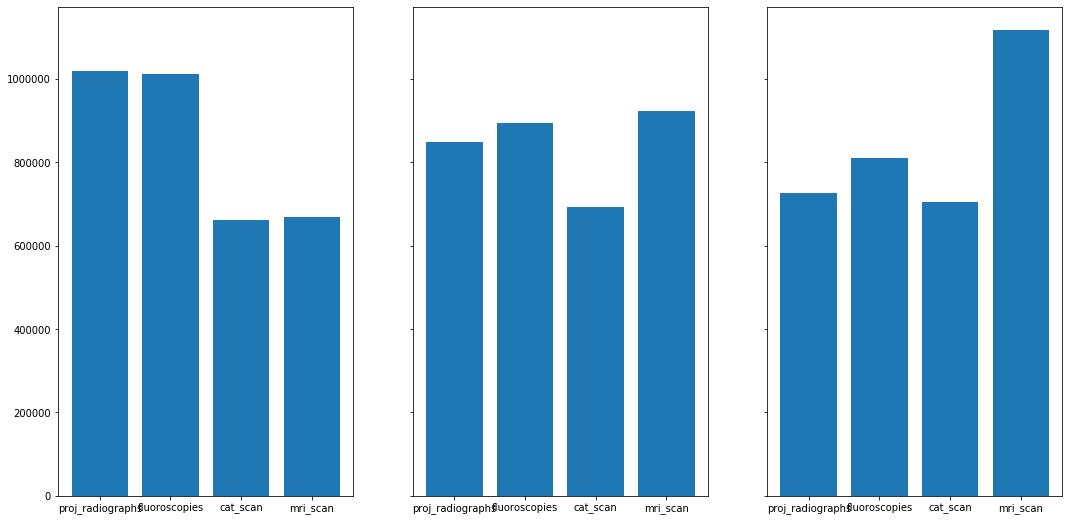

In [76]:
f, axs = plt.subplots(1, 3, figsize=(18,9), sharey=True)
axs[0].bar([k for k in exist_costing], [v for v in exist_costing.values()])
axs[1].bar([k for k in act_costing], [v for v in act_costing.values()])
axs[2].bar([k for k in cons_costing], [v for v in cons_costing.values()])